In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [9]:
Bikes = pd.read_csv(r'C:\Users\SARANYA\Downloads\day.csv')

In [10]:
# Printing 5 rows (ie the head) with all the columns:
Bikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [21]:
# Inspecting the shape
Bikes.shape

(730, 16)

-- The Data we are dealing with has **730** rows and **16** columns

In [11]:
# Basic information about the Data Types and if any null present:
Bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
# Describing the data:
Bikes.describe(include='all')

instant      dteday      season          yr        mnth  \
count   730.000000         730  730.000000  730.000000  730.000000   
unique         NaN         730         NaN         NaN         NaN   
top            NaN  07-10-2018         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    365.500000         NaN    2.498630    0.500000    6.526027   
std     210.877136         NaN    1.110184    0.500343    3.450215   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.250000         NaN    2.000000    0.000000    4.000000   
50%     365.500000         NaN    3.000000    0.500000    7.000000   
75%     547.750000         NaN    3.000000    1.000000   10.000000   
max     730.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   730.000000  730.000000  730.000000  730.000000  730.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.028767    2.995890    0.690411    1.394521   20.319259   
std       0.167266    2.000339    0.462641    0.544807    7.506729   
min       0.000000    0.000000    0.000000    1.000000    2.424346   
25%       0.000000    1.000000    0.000000    1.000000   13.811885   
50%       0.000000    3.000000    1.000000    1.000000   20.465826   
75%       0.000000    5.000000    1.000000    2.000000   26.880615   
max       1.000000    6.000000    1.000000    3.000000   35.328347   

             atemp         hum   windspeed       casual   registered  \
count   730.000000  730.000000  730.000000   730.000000   730.000000   
unique         NaN         NaN         NaN          NaN          NaN   
top            NaN         NaN         NaN          NaN          NaN   
freq           NaN         NaN         NaN          NaN          NaN   
mean     23.726322   62.765175   12.763620   849.249315  3658.757534   
std       8.150308   14.237589    5.195841   686.479875  1559.758728   
min       3.953480    0.000000    1.500244     2.000000    20.000000   
25%      16.889713   52.000000    9.041650   316.250000  2502.250000   
50%      24.368225   62.625000   12.125325   717.000000  3664.500000   
75%      30.445775   72.989575   15.625589  1096.500000  4783.250000   
max      42.044800   97.250000   34.000021  3410.000000  6946.000000   

                cnt  
count    730.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean    4508.006849  
std     1936.011647  
min       22.000000  
25%     3169.750000  
50%     4548.500000  
75%     5966.000000  
max     8714.000000

# Step 2: Prelim Analysis on the Data


In [13]:
# The columns we would drop are : 'instant','dteday','casual','registered'
# For this we will first make the copy of our Bikes Data and then delete the Data:

Bikes_upd = Bikes.copy()
Bikes_upd.drop(['instant','dteday','casual','registered'],axis =1 ,inplace = True)

In [14]:
# Viewing the Updated DataFrame:
Bikes_upd.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [16]:
# Viewing the Shape of the updated DataFrame:
Bikes_upd.shape

(730, 12)

In [17]:
# Cross Checking the missing values:
Bikes_upd.isnull().sum()


season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

-- We can find that the columns have no missing values.

## Step 3: Visulaization of Our Data

<Figure size 1080x1224 with 0 Axes>

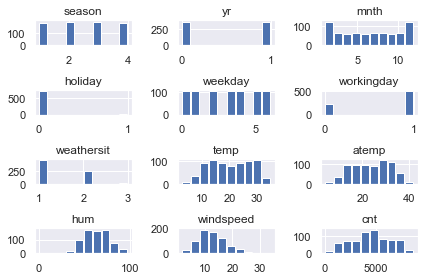

In [18]:
# Plotting The histogram for our Data:

plt.figure(figsize=(15, 17))
Bikes_upd.hist(rwidth = 0.9)
plt.tight_layout()
plt.show()

-- We see that the target varible in our data follows the Normal dist which statisfies one of our MLR Assumption, which also tells us that Target Variable does'nt have Outliers Present.

## Step 3.1 : Visualization of our Continous Variable:

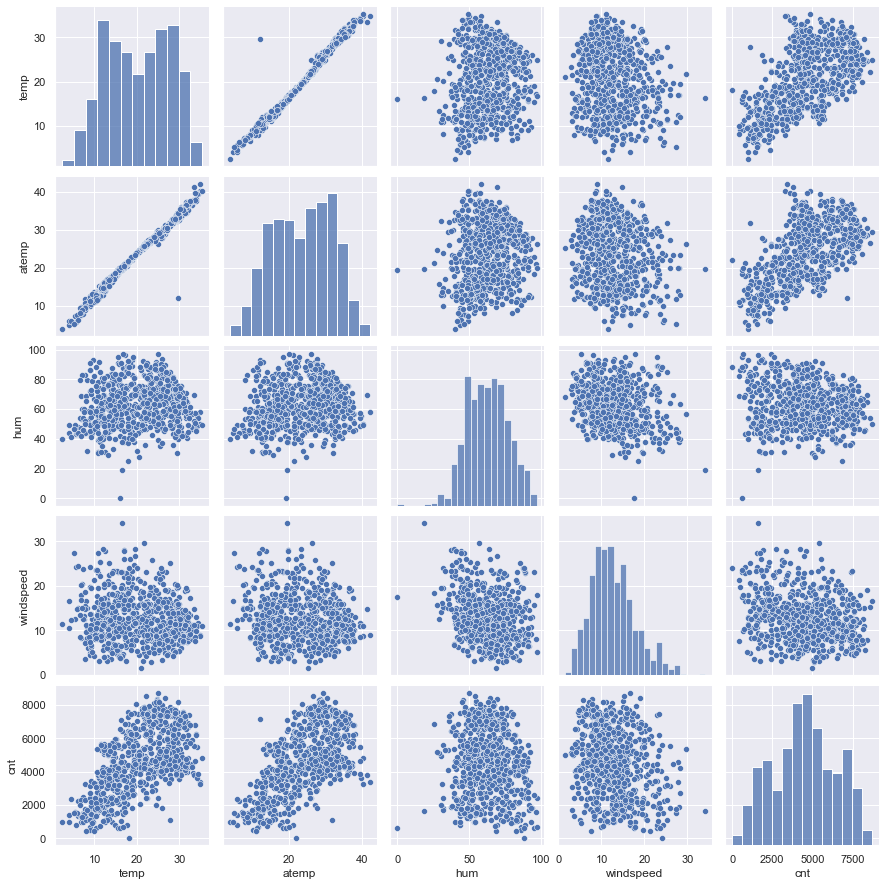

In [19]:
# Visualize the Continous variables with the target Varible:
# Making a pair plot to find the relationship between them:

Bikes_Cont = Bikes_upd[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(Bikes_Cont)

- We see that there is a Linear Relationship Between 'cnt' and 'temp/atemp' variable
- But not so with 'hum' and 'windspeed' variable
- We can also see how feature variables are related to each other (temp and atemp), which we will deal later.

## Step 3.2 : Visualization of our Categorical Variable:

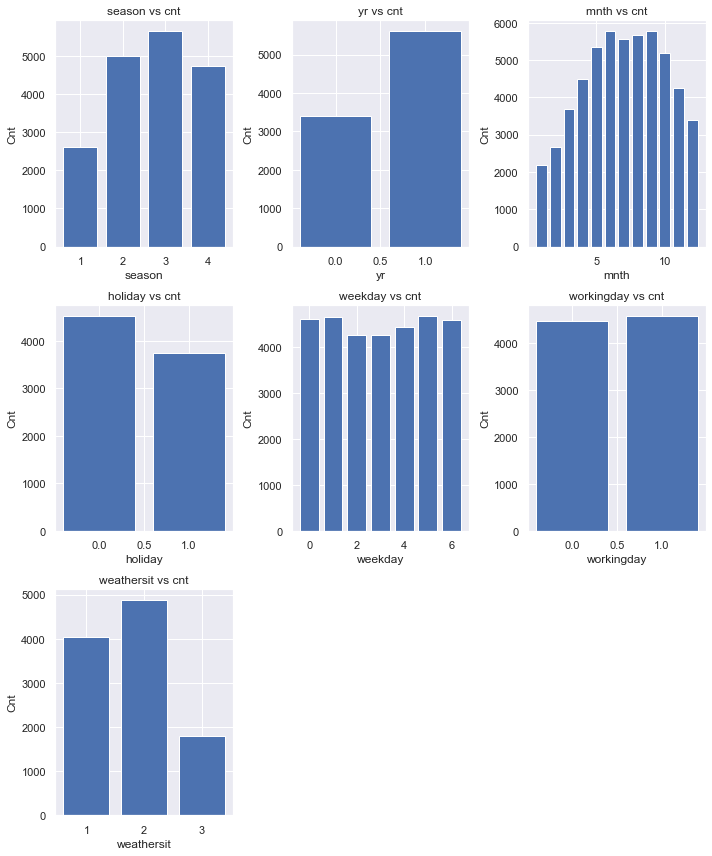

In [20]:
# Plotting the Categorical Values against the Target Variable:
## Getting the avg cnt per the Cat Variables and Plotting it against the Target Varible:

categorical = ['season', 'yr', 'mnth','holiday','weekday','workingday','weathersit']

plt.figure(figsize = (10,12))
i = 1
for col in categorical:
    cat_Unique = Bikes_upd[col].unique()
    cat_avg = Bikes_upd.groupby(col)['cnt'].mean()
    plt.subplot(3,3,i)
    title = col  + ' vs cnt'
    plt.bar(cat_Unique,cat_avg)
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Cnt')
    #plt.xticks(rotation = 90)
    i += 1

plt.tight_layout()    
plt.show()

- This shows us the Avg cnt vs different Cat variables.
- We can see a definite trend here in the avg demand across the cat variable

## Step 4: Checking the MLR Assumptions:

<AxesSubplot:>

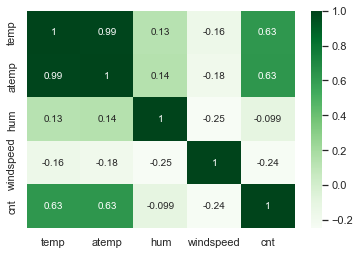

In [21]:
## Checking the correlation between the continous Variable:

correlation = Bikes_Cont.corr()

# plotting it in the heat map:

sns.heatmap(data=correlation,annot = True, cmap="Greens")

- From the heat map above and then the above plots we find that, 'Workingday', 'Weekday' are insignificant and we may drop it.
- Also, we can see from the Heat Map that Humidity is poorly corelated with cnt so can be dropped
- Following the rule of Multi Collineraity we shall also drop atemp from calculations.

In [22]:
# Dropping the above features before our Model Building:
# we'll drop the below features as some our insigficant and others are poorly corelated or multicolinerated.

Bikes_final = Bikes_upd.drop(['workingday','weekday','atemp','hum'], axis = 1)
Bikes_final.head()

season  yr  mnth  holiday  weathersit       temp  windspeed   cnt
0       1   0     1        0           2  14.110847  10.749882   985
1       1   0     1        0           2  14.902598  16.652113   801
2       1   0     1        0           1   8.050924  16.636703  1349
3       1   0     1        0           1   8.200000  10.739832  1562
4       1   0     1        0           1   9.305237  12.522300  1600

In [23]:
# Shape of the Final Bikes Data:

Bikes_final.shape

(730, 8)

## Step 5: Data Preparation:

## Step 5.1: Dummy Variables

In [24]:
## Firstly we'll see the dtypes of Final Bikes Data:

Bikes_final.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weathersit      int64
temp          float64
windspeed     float64
cnt             int64
dtype: object

- Now for creating Dummy Variables we want our Catergorical variables to be converted to Category.

In [25]:
# Changing our Categorical Variables datatype from int64 to Category

categorical_new = ['season', 'yr', 'mnth','holiday','weathersit']

for i in categorical_new:
    Bikes_final[i] = Bikes_final[i].astype('category')

# Checking our new Data Type:

Bikes_final.dtypes

season        category
yr            category
mnth          category
holiday       category
weathersit    category
temp           float64
windspeed      float64
cnt              int64
dtype: object

In [26]:
## Creating the dummies finally after changing the data type:

Bikes_final = pd.get_dummies(Bikes_final,drop_first= True)

In [27]:
# Checking the shape of the Data:

Bikes_final.shape

(730, 21)

In [28]:
# Printing the head:

Bikes_final.head()

temp  windspeed   cnt  season_2  season_3  season_4  yr_1  mnth_2  \
0  14.110847  10.749882   985         0         0         0     0       0   
1  14.902598  16.652113   801         0         0         0     0       0   
2   8.050924  16.636703  1349         0         0         0     0       0   
3   8.200000  10.739832  1562         0         0         0     0       0   
4   9.305237  12.522300  1600         0         0         0     0       0   

   mnth_3  mnth_4  ...  mnth_6  mnth_7  mnth_8  mnth_9  mnth_10  mnth_11  \
0       0       0  ...       0       0       0       0        0        0   
1       0       0  ...       0       0       0       0        0        0   
2       0       0  ...       0       0       0       0        0        0   
3       0       0  ...       0       0       0       0        0        0   
4       0       0  ...       0       0       0       0        0        0   

   mnth_12  holiday_1  weathersit_2  weathersit_3  
0        0          0             1             0  
1        0          0             1             0  
2        0          0             0             0  
3        0          0             0             0  
4        0          0             0             0  

[5 rows x 21 columns]

## Step 6: Splitting into Test and Train Set:

In [29]:
# Splitting the Data

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
Bikes_train, Bikes_test = train_test_split(Bikes_final, train_size = 0.7, test_size = 0.3, random_state = 100)

## Resclaing the Features

In [30]:
## Resclaing all the continous variable before building the model:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

Bikes_Cont_new = ['temp','windspeed','cnt']

Bikes_train[Bikes_Cont_new] = scaler.fit_transform(Bikes_train[Bikes_Cont_new])

In [31]:
## Viewing the head of the Data:

Bikes_train.head()

temp  windspeed       cnt  season_2  season_3  season_4  yr_1  \
653  0.509887   0.300794  0.864243         0         0         1     1   
576  0.815169   0.264686  0.827658         0         1         0     1   
426  0.442393   0.255342  0.465255         0         0         0     1   
728  0.245101   0.663106  0.204096         0         0         0     1   
482  0.395666   0.188475  0.482973         1         0         0     1   

     mnth_2  mnth_3  mnth_4  ...  mnth_6  mnth_7  mnth_8  mnth_9  mnth_10  \
653       0       0       0  ...       0       0       0       0        1   
576       0       0       0  ...       0       1       0       0        0   
426       0       1       0  ...       0       0       0       0        0   
728       0       0       0  ...       0       0       0       0        0   
482       0       0       1  ...       0       0       0       0        0   

     mnth_11  mnth_12  holiday_1  weathersit_2  weathersit_3  
653        0        0          0             0             0  
576        0        0          0             0             0  
426        0        0          0             1             0  
728        0        1          0             0             0  
482        0        0          0             1             0  

[5 rows x 21 columns]

In [32]:
## Making X and Y out of the Split:

y_train = Bikes_train.pop('cnt')
X_train = Bikes_train

## Step 7: Building the Linear Model:

In [33]:
## We'll build the model using RFE and thus we'll import the imp Libraries to perfrom our action:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('yr_1', True, 1),
 ('mnth_2', False, 3),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 4),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 2),
 ('mnth_11', False, 5),
 ('mnth_12', False, 6),
 ('holiday_1', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [36]:
# Adding the 15 columns in the col variable using RFE
col = X_train.columns[rfe.support_]
col

Index(['temp', 'windspeed', 'season_2', 'season_3', 'season_4', 'yr_1',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9', 'holiday_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [37]:
# Removing the unwanted columns from the X Train Dataset
X_train.columns[~rfe.support_]

Index(['mnth_2', 'mnth_7', 'mnth_10', 'mnth_11', 'mnth_12'], dtype='object')

In [38]:
# Removing the unwanted columns from the X Train Dataset
X_train.columns[~rfe.support_]

Index(['mnth_2', 'mnth_7', 'mnth_10', 'mnth_11', 'mnth_12'], dtype='object')

In [39]:
# Updating our X_train
X_train = X_train[col]
X_train

temp  windspeed  season_2  season_3  season_4  yr_1  mnth_3  mnth_4  \
653  0.509887   0.300794         0         0         1     1       0       0   
576  0.815169   0.264686         0         1         0     1       0       0   
426  0.442393   0.255342         0         0         0     1       1       0   
728  0.245101   0.663106         0         0         0     1       0       0   
482  0.395666   0.188475         1         0         0     1       0       1   
..        ...        ...       ...       ...       ...   ...     ...     ...   
526  0.824514   0.355596         1         0         0     1       0       0   
578  0.863973   0.187140         0         1         0     1       0       0   
53   0.202618   0.111379         0         0         0     0       0       0   
350  0.248216   0.431816         0         0         1     0       0       0   
79   0.462664   0.529881         1         0         0     0       1       0   

     mnth_5  mnth_6  mnth_8  mnth_9  holiday_1  weathersit_2  weathersit_3  
653       0       0       0       0          0             0             0  
576       0       0       0       0          0             0             0  
426       0       0       0       0          0             1             0  
728       0       0       0       0          0             0             0  
482       0       0       0       0          0             1             0  
..      ...     ...     ...     ...        ...           ...           ...  
526       0       1       0       0          0             1             0  
578       0       0       1       0          0             0             0  
53        0       0       0       0          0             0             0  
350       0       0       0       0          0             1             0  
79        0       0       0       0          0             1             0  

[510 rows x 15 columns]

In [52]:
# Building our Model using Statsmodel: 

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     170.9
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.88e-184
Time:                        10:15:29   Log-Likelihood:                 503.37
No. Observations:                 510   AIC:                            -974.7
Df Residuals:                     494   BIC:                            -907.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1315      0.017      7.628      0.000       0.098       0.165
temp             0.4529      0.036     12.633      0.000       0.382       0.523
windspeed       -0.1514      0.025     -5.973      0.000      -0.201      -0.102
season_2         0.0842      0.022      3.770      0.000       0.040       0.128
season_3         0.0516      0.023      2.216      0.027       0.006       0.097
season_4         0.1665      0.014     11.929      0.000       0.139       0.194
yr_1             0.2337      0.008     28.382      0.000       0.218       0.250
mnth_3           0.0525      0.017      3.033      0.003       0.019       0.087
mnth_4           0.0504      0.026      1.907      0.057      -0.002       0.102
mnth_5           0.0608      0.027      2.259      0.024       0.008       0.114
mnth_6           0.0435      0.023      1.890      0.059      -0.002       0.089
mnth_8           0.0537      0.019      2.898      0.004       0.017       0.090
mnth_9           0.1136      0.018      6.382      0.000       0.079       0.149
holiday_1       -0.0899      0.026     -3.450      0.001      -0.141      -0.039
weathersit_2    -0.0818      0.009     -9.292      0.000      -0.099      -0.064
weathersit_3    -0.2844      0.025    -11.529      0.000      -0.333      -0.236
==============================================================================
Omnibus:                       60.900   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.192
Skew:                          -0.641   Prob(JB):                     3.61e-31
Kurtosis:                       5.226   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 pip install statsmodels 

## Checking VIF

In [53]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0           temp  17.84
3       season_3   8.40
2       season_2   7.41
8         mnth_5   3.71
1      windspeed   3.60
7         mnth_4   3.33
4       season_4   2.85
9         mnth_6   2.38
5           yr_1   2.05
10        mnth_8   2.01
6         mnth_3   1.76
11        mnth_9   1.55
13  weathersit_2   1.51
14  weathersit_3   1.09
12     holiday_1   1.04

## Dropping the feature and building the model again:

In [55]:
X_new = X_train.drop('mnth_6', 1)

In [56]:
X_train_lm = sm.add_constant(X_new)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     181.9
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          8.03e-185
Time:                        10:16:56   Log-Likelihood:                 501.54
No. Observations:                 510   AIC:                            -973.1
Df Residuals:                     495   BIC:                            -909.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1290      0.017      7.485      0.000       0.095       0.163
temp             0.4748      0.034     13.964      0.000       0.408       0.542
windspeed       -0.1511      0.025     -5.947      0.000      -0.201      -0.101
season_2         0.1045      0.020      5.324      0.000       0.066       0.143
season_3         0.0468      0.023      2.018      0.044       0.001       0.092
season_4         0.1603      0.014     11.783      0.000       0.134       0.187
yr_1             0.2333      0.008     28.268      0.000       0.217       0.250
mnth_3           0.0391      0.016      2.470      0.014       0.008       0.070
mnth_4           0.0222      0.022      1.015      0.310      -0.021       0.065
mnth_5           0.0292      0.021      1.381      0.168      -0.012       0.071
mnth_8           0.0438      0.018      2.457      0.014       0.009       0.079
mnth_9           0.1066      0.017      6.107      0.000       0.072       0.141
holiday_1       -0.0920      0.026     -3.529      0.000      -0.143      -0.041
weathersit_2    -0.0826      0.009     -9.379      0.000      -0.100      -0.065
weathersit_3    -0.2865      0.025    -11.597      0.000      -0.335      -0.238
==============================================================================
Omnibus:                       61.542   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.403
Skew:                          -0.658   Prob(JB):                     1.46e-30
Kurtosis:                       5.176   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
## Checking the VIF again:

vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0           temp  15.75
3       season_3   8.32
2       season_2   5.65
1      windspeed   3.60
4       season_4   2.67
8         mnth_5   2.28
7         mnth_4   2.25
5           yr_1   2.04
9         mnth_8   1.85
12  weathersit_2   1.50
10        mnth_9   1.48
6         mnth_3   1.44
13  weathersit_3   1.08
11     holiday_1   1.04

## Dropping the Feature and building the model:

In [58]:
X_new = X_new.drop('mnth_4', 1)

X_train_lm = sm.add_constant(X_new)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     195.8
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          9.38e-186
Time:                        10:18:04   Log-Likelihood:                 501.01
No. Observations:                 510   AIC:                            -974.0
Df Residuals:                     496   BIC:                            -914.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1305      0.017      7.602      0.000       0.097       0.164
temp             0.4693      0.034     13.982      0.000       0.403       0.535
windspeed       -0.1479      0.025     -5.866      0.000      -0.197      -0.098
season_2         0.1165      0.016      7.433      0.000       0.086       0.147
season_3         0.0486      0.023      2.103      0.036       0.003       0.094
season_4         0.1601      0.014     11.768      0.000       0.133       0.187
yr_1             0.2338      0.008     28.384      0.000       0.218       0.250
mnth_3           0.0341      0.015      2.266      0.024       0.005       0.064
mnth_5           0.0182      0.018      1.001      0.317      -0.017       0.054
mnth_8           0.0438      0.018      2.457      0.014       0.009       0.079
mnth_9           0.1065      0.017      6.102      0.000       0.072       0.141
holiday_1       -0.0918      0.026     -3.519      0.000      -0.143      -0.041
weathersit_2    -0.0828      0.009     -9.394      0.000      -0.100      -0.065
weathersit_3    -0.2865      0.025    -11.595      0.000      -0.335      -0.238
==============================================================================
Omnibus:                       62.807   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.621
Skew:                          -0.667   Prob(JB):                     1.77e-31
Kurtosis:                       5.210   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
## Checking the VIF again:

vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0           temp  15.46
3       season_3   8.29
2       season_2   3.63
1      windspeed   3.44
4       season_4   2.67
5           yr_1   2.03
8         mnth_8   1.85
7         mnth_5   1.68
11  weathersit_2   1.50
9         mnth_9   1.48
6         mnth_3   1.31
12  weathersit_3   1.08
10     holiday_1   1.04

## Dropping the Feature and building the model again:

In [60]:
X_new = X_new.drop('mnth_5', 1)

X_train_lm = sm.add_constant(X_new)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.04e-186
Time:                        10:20:11   Log-Likelihood:                 500.49
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -919.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1301      0.017      7.580      0.000       0.096       0.164
temp             0.4762      0.033     14.494      0.000       0.412       0.541
windspeed       -0.1502      0.025     -5.979      0.000      -0.199      -0.101
season_2         0.1204      0.015      7.920      0.000       0.091       0.150
season_3         0.0442      0.023      1.949      0.052      -0.000       0.089
season_4         0.1582      0.013     11.746      0.000       0.132       0.185
yr_1             0.2333      0.008     28.376      0.000       0.217       0.249
mnth_3           0.0312      0.015      2.112      0.035       0.002       0.060
mnth_8           0.0437      0.018      2.451      0.015       0.009       0.079
mnth_9           0.1066      0.017      6.105      0.000       0.072       0.141
holiday_1       -0.0925      0.026     -3.547      0.000      -0.144      -0.041
weathersit_2    -0.0821      0.009     -9.345      0.000      -0.099      -0.065
weathersit_3    -0.2866      0.025    -11.599      0.000      -0.335      -0.238
==============================================================================
Omnibus:                       61.437   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.121
Skew:                          -0.664   Prob(JB):                     7.51e-30
Kurtosis:                       5.132   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
## Checking the VIF again:

vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0           temp  14.62
3       season_3   8.00
2       season_2   3.41
1      windspeed   3.39
4       season_4   2.61
5           yr_1   2.02
7         mnth_8   1.85
10  weathersit_2   1.50
8         mnth_9   1.48
6         mnth_3   1.25
11  weathersit_3   1.08
9      holiday_1   1.04

## Dropping the feature and building the model again

In [62]:
X_new = X_new.drop('season_3', 1)

X_train_lm = sm.add_constant(X_new)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.7
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          4.40e-187
Time:                        10:21:29   Log-Likelihood:                 498.55
No. Observations:                 510   AIC:                            -973.1
Df Residuals:                     498   BIC:                            -922.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1250      0.017      7.350      0.000       0.092       0.158
temp             0.5235      0.022     23.597      0.000       0.480       0.567
windspeed       -0.1527      0.025     -6.074      0.000      -0.202      -0.103
season_2         0.1001      0.011      9.023      0.000       0.078       0.122
season_4         0.1427      0.011     13.092      0.000       0.121       0.164
yr_1             0.2323      0.008     28.230      0.000       0.216       0.248
mnth_3           0.0255      0.015      1.759      0.079      -0.003       0.054
mnth_8           0.0563      0.017      3.382      0.001       0.024       0.089
mnth_9           0.1180      0.016      7.155      0.000       0.086       0.150
holiday_1       -0.0945      0.026     -3.615      0.000      -0.146      -0.043
weathersit_2    -0.0825      0.009     -9.366      0.000      -0.100      -0.065
weathersit_3    -0.2843      0.025    -11.487      0.000      -0.333      -0.236
==============================================================================
Omnibus:                       55.139   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.850
Skew:                          -0.619   Prob(JB):                     1.90e-25
Kurtosis:                       4.955   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
## Checking the VIF again:

vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0           temp  5.01
1      windspeed  3.29
4           yr_1  2.01
2       season_2  1.81
6         mnth_8  1.59
3       season_4  1.53
9   weathersit_2  1.49
7         mnth_9  1.31
5         mnth_3  1.19
10  weathersit_3  1.08
8      holiday_1  1.04

## Dropping the feature and Building the model again:

In [64]:
X_new = X_new.drop('mnth_3', 1)

X_train_lm = sm.add_constant(X_new)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.26e-187
Time:                        10:22:40   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1312      0.017      7.871      0.000       0.098       0.164
temp             0.5174      0.022     23.564      0.000       0.474       0.560
windspeed       -0.1497      0.025     -5.956      0.000      -0.199      -0.100
season_2         0.1000      0.011      8.995      0.000       0.078       0.122
season_4         0.1383      0.011     13.003      0.000       0.117       0.159
yr_1             0.2325      0.008     28.202      0.000       0.216       0.249
mnth_8           0.0542      0.017      3.253      0.001       0.021       0.087
mnth_9           0.1162      0.016      7.045      0.000       0.084       0.149
holiday_1       -0.0971      0.026     -3.715      0.000      -0.148      -0.046
weathersit_2    -0.0825      0.009     -9.354      0.000      -0.100      -0.065
weathersit_3    -0.2828      0.025    -11.411      0.000      -0.332      -0.234
==============================================================================
Omnibus:                       55.419   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.468
Skew:                          -0.605   Prob(JB):                     6.93e-27
Kurtosis:                       5.050   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
## Checking the VIF again:

vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0          temp  5.01
1     windspeed  3.10
4          yr_1  2.00
2      season_2  1.81
5        mnth_8  1.58
3      season_4  1.49
8  weathersit_2  1.48
6        mnth_9  1.31
9  weathersit_3  1.08
7     holiday_1  1.04

## Dropping the feature and building the model again:

In [66]:
X_new = X_new.drop('windspeed', 1)

X_train_lm = sm.add_constant(X_new)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.6
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.99e-181
Time:                        10:23:34   Log-Likelihood:                 479.46
No. Observations:                 510   AIC:                            -938.9
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0703      0.014      5.164      0.000       0.044       0.097
temp             0.5390      0.022     24.080      0.000       0.495       0.583
season_2         0.0956      0.011      8.336      0.000       0.073       0.118
season_4         0.1462      0.011     13.389      0.000       0.125       0.168
yr_1             0.2313      0.009     27.142      0.000       0.215       0.248
mnth_8           0.0585      0.017      3.399      0.001       0.025       0.092
mnth_9           0.1236      0.017      7.270      0.000       0.090       0.157
holiday_1       -0.1002      0.027     -3.707      0.000      -0.153      -0.047
weathersit_2    -0.0809      0.009     -8.875      0.000      -0.099      -0.063
weathersit_3    -0.2974      0.026    -11.660      0.000      -0.347      -0.247
==============================================================================
Omnibus:                       62.948   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.343
Skew:                          -0.658   Prob(JB):                     1.67e-32
Kurtosis:                       5.270   Cond. No.                         9.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
## Checking the VIF again:

vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0          temp  3.92
3          yr_1  1.94
1      season_2  1.78
4        mnth_8  1.56
2      season_4  1.47
7  weathersit_2  1.44
5        mnth_9  1.29
8  weathersit_3  1.06
6     holiday_1  1.03

In [68]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr_7.predict(X_train_lm)

np.sqrt(mean_squared_error(y_train, y_train_pred))

0.09450945466073261

- We finally get model 7 as our final model. We'll go ahead with this model for our analysis.

## Step 8: Residual Analysis of the train Data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

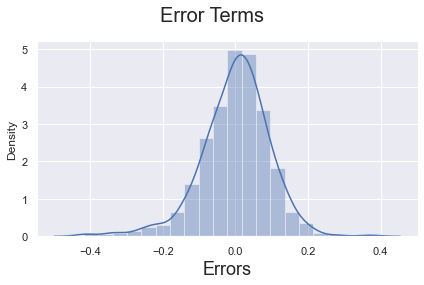

In [69]:
# Predicting the Y-pred on the train Data, from the latest model:

y_train_pred = lr_7.predict(X_train_lm)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

plt.tight_layout()
plt.show()

## Step 9: Making Predictions Using the Final Model:

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the finalmodel.

#### Dividing into X_test and y_test

In [70]:
## Transforming the Test data set
Bikes_Cont_new = ['temp','windspeed','cnt']

Bikes_test[Bikes_Cont_new] = scaler.transform(Bikes_test[Bikes_Cont_new])

In [71]:
# Viewing the test data set
Bikes_test

temp  windspeed       cnt  season_2  season_3  season_4  yr_1  \
184  0.831783   0.084219  0.692706         0         1         0     0   
535  0.901354   0.153728  0.712034         1         0         0     1   
299  0.511964   0.334206  0.303382         0         0         1     0   
221  0.881625   0.339570  0.547400         0         1         0     0   
152  0.817246   0.537414  0.569029         1         0         0     0   
..        ...        ...       ...       ...       ...       ...   ...   
400  0.257562   0.287411  0.336516         0         0         0     1   
702  0.519232   0.283397  0.757478         0         0         1     1   
127  0.584649   0.069510  0.495973         1         0         0     0   
640  0.745598   0.052115  0.868615         0         0         1     1   
72   0.331557   0.203418  0.232858         0         0         0     0   

     mnth_2  mnth_3  mnth_4  ...  mnth_6  mnth_7  mnth_8  mnth_9  mnth_10  \
184       0       0       0  ...       0       1       0       0        0   
535       0       0       0  ...       1       0       0       0        0   
299       0       0       0  ...       0       0       0       0        1   
221       0       0       0  ...       0       0       1       0        0   
152       0       0       0  ...       1       0       0       0        0   
..      ...     ...     ...  ...     ...     ...     ...     ...      ...   
400       1       0       0  ...       0       0       0       0        0   
702       0       0       0  ...       0       0       0       0        0   
127       0       0       0  ...       0       0       0       0        0   
640       0       0       0  ...       0       0       0       0        1   
72        0       1       0  ...       0       0       0       0        0   

     mnth_11  mnth_12  holiday_1  weathersit_2  weathersit_3  
184        0        0          1             1             0  
535        0        0          0             0             0  
299        0        0          0             1             0  
221        0        0          0             0             0  
152        0        0          0             0             0  
..       ...      ...        ...           ...           ...  
400        0        0          0             1             0  
702        0        1          0             0             0  
127        0        0          0             0             0  
640        0        0          0             1             0  
72         0        0          0             0             0  

[219 rows x 21 columns]

In [72]:
# Dividing it into X and y:
y_test = Bikes_test.pop('cnt')
X_test = Bikes_test

In [73]:
# Shape of y_test:
y_test.shape

(219,)

In [74]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
400    0.336516
702    0.757478
127    0.495973
640    0.868615
72     0.232858
Name: cnt, Length: 219, dtype: float64

In [75]:
# Pulling in the required columns for X_test
X_test = X_test[X_new.columns]
X_test

temp  season_2  season_4  yr_1  mnth_8  mnth_9  holiday_1  \
184  0.831783         0         0     0       0       0          1   
535  0.901354         1         0     1       0       0          0   
299  0.511964         0         1     0       0       0          0   
221  0.881625         0         0     0       1       0          0   
152  0.817246         1         0     0       0       0          0   
..        ...       ...       ...   ...     ...     ...        ...   
400  0.257562         0         0     1       0       0          0   
702  0.519232         0         1     1       0       0          0   
127  0.584649         1         0     0       0       0          0   
640  0.745598         0         1     1       0       0          0   
72   0.331557         0         0     0       0       0          0   

     weathersit_2  weathersit_3  
184             1             0  
535             0             0  
299             1             0  
221             0             0  
152             0             0  
..            ...           ...  
400             1             0  
702             0             0  
127             0             0  
640             1             0  
72              0             0  

[219 rows x 9 columns]

In [76]:
# Adding constant variable to test dataframe

import statsmodels.api as sm

X_test_m5 = sm.add_constant(X_test)

In [77]:
X_test_m5

const      temp  season_2  season_4  yr_1  mnth_8  mnth_9  holiday_1  \
184    1.0  0.831783         0         0     0       0       0          1   
535    1.0  0.901354         1         0     1       0       0          0   
299    1.0  0.511964         0         1     0       0       0          0   
221    1.0  0.881625         0         0     0       1       0          0   
152    1.0  0.817246         1         0     0       0       0          0   
..     ...       ...       ...       ...   ...     ...     ...        ...   
400    1.0  0.257562         0         0     1       0       0          0   
702    1.0  0.519232         0         1     1       0       0          0   
127    1.0  0.584649         1         0     0       0       0          0   
640    1.0  0.745598         0         1     1       0       0          0   
72     1.0  0.331557         0         0     0       0       0          0   

     weathersit_2  weathersit_3  
184             1             0  
535             0             0  
299             1             0  
221             0             0  
152             0             0  
..            ...           ...  
400             1             0  
702             0             0  
127             0             0  
640             1             0  
72              0             0  

[219 rows x 10 columns]

In [78]:
# Making predictions using the fourth model

y_test_pred = lr_7.predict(X_test_m5)

In [79]:
# Shape of the Y_test_pred
y_test_pred.shape

(219,)

In [80]:
# Reading the data
y_test_pred

184    0.337521
535    0.882970
299    0.411456
221    0.603950
152    0.606370
         ...   
400    0.359432
702    0.727566
127    0.480991
640    0.768656
72     0.248986
Length: 219, dtype: float64

Text(0, 0.5, 'y_test_pred')

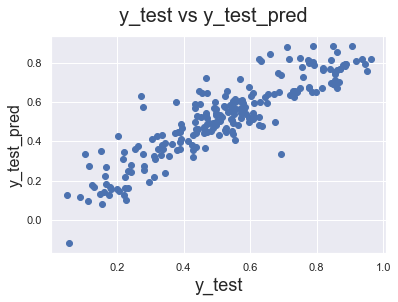

In [81]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                         # Y-label

In [86]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [87]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7964731574157414

In [89]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.09831923448041521

In [90]:
## Calculating the adj R2 value for Test Dataset

# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r_squared)*(n-1)/(n-p-1),4)
adjusted_r2

0.7877

In [91]:
# Comparing our R2, adj R2 value for Test and Train Data

data = [['R2_Value','82.3%','79.6%'],['Adjusted_R2 Value','81.9%','78.7%']]

Comparison_train_test = pd.DataFrame(data, columns = ['Measurement', 'Train Dataset','Test Dataset'])
Comparison_train_test

Measurement Train Dataset Test Dataset
0           R2_Value         82.3%        79.6%
1  Adjusted_R2 Value         81.9%        78.7%

In [92]:
# This is our best fit MLR model: 7
# Displaying it below:

lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.6
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.99e-181
Time:                        10:40:49   Log-Likelihood:                 479.46
No. Observations:                 510   AIC:                            -938.9
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0703      0.014      5.164      0.000       0.044       0.097
temp             0.5390      0.022     24.080      0.000       0.495       0.583
season_2         0.0956      0.011      8.336      0.000       0.073       0.118
season_4         0.1462      0.011     13.389      0.000       0.125       0.168
yr_1             0.2313      0.009     27.142      0.000       0.215       0.248
mnth_8           0.0585      0.017      3.399      0.001       0.025       0.092
mnth_9           0.1236      0.017      7.270      0.000       0.090       0.157
holiday_1       -0.1002      0.027     -3.707      0.000      -0.153      -0.047
weathersit_2    -0.0809      0.009     -8.875      0.000      -0.099      -0.063
weathersit_3    -0.2974      0.026    -11.660      0.000      -0.347      -0.247
==============================================================================
Omnibus:                       62.948   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.343
Skew:                          -0.658   Prob(JB):                     1.67e-32
Kurtosis:                       5.270   Cond. No.                         9.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## STEP 10: FINAL RESULT

### We can see that the equation for best fitted line is:

$ cnt = 0.5390  \times  temp + 0.0956  \times  summer + 0.1462 \times winter + 0.2313 \times yr_1 + 0.0585 \times mnth_8 + 0.1236 \times mnth_9 - 0.1002 \times holiday_1 -0.0809 \times Mist + Cloudy - 0.2974 \times Light Rain + Thunderstorm $


## We can see the demand for bikes depends mainly on below variables:

- temp, summer, winter, yr_1, Light rain_Light snow_Thunderstorm, mnth_8, mnth_9, holiday, mist + cloudy

- Demands increases in the month of 8 ,9 and also when the seasons are 'summer' and 'winter', also the demand has a strong coeff with the temp. So that has to be also taken into account.

- Demand decreases if it is holiday, Light rain_Light snow_Thunderstorm, Mist_cloudy


## Final recommendations for the company:

- Demand is higher in month of 8, 9 
- Also, we see a seasonal inclination towards the Bike sharing, prefarrably 'summer' and 'winter'
- The company should also take care of temp as it has a huge impact on the model, and it can help in increasing the demand.
 